In [91]:
import json
from matplotlib import pyplot as plt
from matplotlib import colormaps
import os
from PIL import Image
from glob import glob
import cv2
import numpy as np

%matplotlib ipympl
# %matplotlib inline

/tmp/ipykernel_20987/3151762401.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(label['x'], label['y'], s = 1, c = color_dict[label['label']], label=label['label'])


KeyError: 'Right Hip'

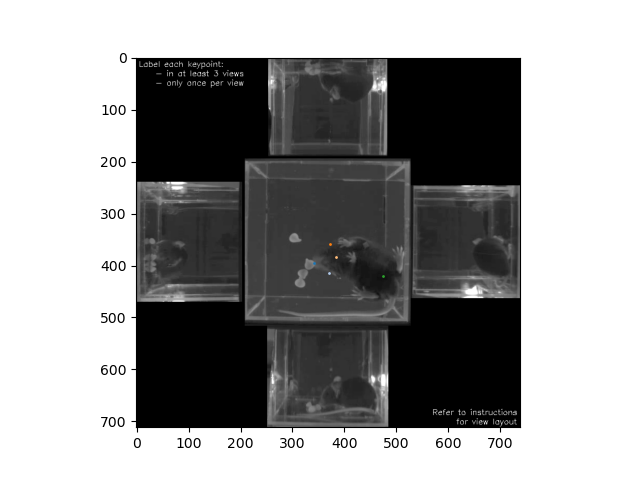

In [2]:
image_dir = '/home/klb807/MARS_project/3d/annotation_data/raw_images'
fid = open('/home/klb807/MARS_project/3d/annotation_data/output.manifest')

labels = ['Nose','Right Ear','Left Ear', 'Throat', 'Spine Center', 'Right Knee', 'Left Knee', 'Right Front Paw', 'Left Front Paw', 'Right Rear Paw', 'Left Rear Paw', 'Tail Base', 'Tail Middle', 'Tail Tip']
cmap = colormaps['tab20'].colors

color_dict = {labels[ii]:cmap[ii] for ii in range(len(labels))}


# fig,ax = plt.subplots(ncols=3, nrows=4)
for i_line,line in enumerate(fid.readlines()):
    fig,ax = plt.subplots()
    # set up image file path
    image_path = os.path.join(image_dir,os.path.split(json.loads(line)['source-ref'])[-1])
    
    # pull out the keypoints
    im_array = Image.open(image_path)
    ax.imshow(im_array)
    

    data = json.loads(line)['annotatedResult']
    for worker_label in data['annotationsFromAllWorkers']:
        sub_data = eval(worker_label['annotationData']['content'])
        for label in sub_data['annotatedResult']['keypoints']:
            ax.scatter(label['x'], label['y'], s = 1, c = color_dict[label['label']], label=label['label'])

        ax.legend()
            
    fig.savefig(os.path.splitext(image_path)[0] + '_labeled.png', dpi=300)


fid.close()

In [40]:
image_list = [item for file in ['*.jpg','*.tiff','*.png'] for item in glob(os.path.join(image_dir,file))]

In [41]:
for image_fn in image_list:
    image = cv2.imread(image_fn)
    

['/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001303_labeled.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00004497_labeled.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00004536.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001943.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001303.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001993.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00004497.png',
 '/home/klb807/MARS_project/3d/annotation_data/raw_images/Basler_acA1300-60gm__24254439__20231101_163030170_00001943_labele

In [3]:
data

{'annotationsFromAllWorkers': [{'workerId': 'vendor.us-east-2.d90f632b1e2dfc2b',
   'annotationData': {'content': '{"annotatedResult":{"inputImageProperties":{"height":712,"width":738},"keypoints":[{"label":"Nose","x":342,"y":395},{"label":"Right Ear","x":371,"y":414},{"label":"Left Ear","x":373,"y":359},{"label":"Throat","x":383,"y":383},{"label":"Spine Center","x":475,"y":420},{"label":"Right Hip","x":456,"y":467},{"label":"Left Hip","x":492,"y":381},{"label":"Right Front Paw","x":415,"y":384},{"label":"Left Front Paw","x":395,"y":357},{"label":"Right Rear Paw","x":431,"y":456},{"label":"Left Rear Paw","x":504,"y":379},{"label":"Tail Base","x":496,"y":460},{"label":"Tail Middle","x":393,"y":495},{"label":"Tail Tip","x":276,"y":490},{"label":"Tail Tip","x":41,"y":387},{"label":"Right Ear","x":77,"y":394},{"label":"Left Ear","x":83,"y":360},{"label":"Throat","x":39,"y":379},{"label":"Spine Center","x":99,"y":382},{"label":"Right Hip","x":52,"y":425},{"label":"Left Hip","x":49,"y":354},

In [21]:
with open('/home/klb807/Documents/AWS_labeling_setup/boundaries.txt') as fid:
    output_dict = {line.split(':')[0]:eval(line.split(':')[1]) for line in fid.readlines()}

In [92]:
im = cv2.imread('/home/klb807/Downloads/Basler_acA1300-60gm__24254439__20230330_144351078_0000.tiff')
fig,ax = plt.subplots(nrows=5)

# print(im[:,:,np.newaxis])
ax[0].imshow(im)

# # flip horizontally - "south" view
ax[1].imshow(im[:,::-1])
# print(im[:,::-1])

# # flip vertically - 'north' view
ax[2].imshow(im[::-1,:])
# print(im[::-1])

# # transpose - 'east' view
# print(im[:,:,np.newaxis].transpose((1,0,2)))
print(im)

# flip, transpose, flip - 'west' view
print(im[::-1].T[::-1])

# print(np.matmul(im,np.eye(im.shape[0])[::-1]))

[[[[111 111 111]]

  [[111 111 111]]

  [[108 108 108]]

  ...

  [[ 97  97  97]]

  [[ 95  95  95]]

  [[ 98  98  98]]]


 [[[112 112 112]]

  [[106 106 106]]

  [[109 109 109]]

  ...

  [[ 98  98  98]]

  [[ 96  96  96]]

  [[ 99  99  99]]]


 [[[109 109 109]]

  [[108 108 108]]

  [[109 109 109]]

  ...

  [[ 96  96  96]]

  [[ 94  94  94]]

  [[100 100 100]]]


 ...


 [[[141 141 141]]

  [[146 146 146]]

  [[147 147 147]]

  ...

  [[117 117 117]]

  [[117 117 117]]

  [[116 116 116]]]


 [[[140 140 140]]

  [[142 142 142]]

  [[144 144 144]]

  ...

  [[121 121 121]]

  [[122 122 122]]

  [[118 118 118]]]


 [[[142 142 142]]

  [[141 141 141]]

  [[148 148 148]]

  ...

  [[117 117 117]]

  [[117 117 117]]

  [[115 115 115]]]]
[[[ 98  98  98]
  [ 95  95  95]
  [ 97  97  97]
  ...
  [108 108 108]
  [111 111 111]
  [111 111 111]]

 [[ 99  99  99]
  [ 96  96  96]
  [ 98  98  98]
  ...
  [109 109 109]
  [106 106 106]
  [112 112 112]]

 [[100 100 100]
  [ 94  94  94]
  [ 96  96  96]


ValueError: axes don't match array